In [863]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [864]:
Cm = 1
g_Na, g_K, g_V = 120, 36, 0.3
E_Na, E_K, E_V = 115, -12, 10.6

In [865]:
def alpha_n(V):
    if V==10:
        return 1 / (np.exp((25-V)/10) * 10) #l'hopital
    else:
        return 0.01 * (10-V) / (np.exp((10-V)/10) - 1)

def alpha_m(V):
    if V==25:
        return 1 / np.exp((25-V)/10)
    else:
        return 0.1 * (25-V) / (np.exp((25-V)/10) - 1)   #l'hopital

def beta_n(V): return 0.125*np.exp(-V/80)
def beta_m(V): return 4*np.exp(-V/18)
def alpha_h(V): return 0.07*np.exp(-V/20)
def beta_h(V): return 1 / (np.exp((30-V)/10))


def I_Na(V,m,h): return g_Na * m**3 * h * (V-E_Na)
def I_K(V,n): return g_K * n**4 * (V-E_K)
def I_V(V): return g_V * (V-E_V)

In [866]:
t = np.arange(0, 80, 0.001) #intervalo de tempo
def J_inj(t):   #corrente injetada
    L = 10.7
    J1 = 17
    t1 = 10
    t1f = 10.5
    J2 = 37
    t2 = (10 + L)
    t2f = (10 + L) + 0.5
    return J1*(t>t1)-J1*(t>t1f)+J2*(t>t2)-J2*(t>t2f)

def dALLdt(X, t):
    V, m, h, n = X
    dVdt = (J_inj(t) - I_Na(V,m,h) - I_K(V, n) - I_V(V)) / Cm
    dndt = alpha_n(V) * (1-n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1-m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1-h) - beta_h(V) * h
    return dVdt, dmdt, dhdt, dndt

In [867]:
X = odeint(dALLdt, [0, 0.32, 0.05, 0.6], t)
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]

In [868]:
L = [14.5, 14.1, 13.8, 13.5, 13.2, 13, 12.8, 12.5, 12.3, 12.1, 12, 11.8, 11.6, 11.5, 11.3, 11.2, 11.1, 10.9, 10.8, 10.7, 10.6, 10.5, 10.4, 10.3, 10.2, 10.1, 10]

J2 = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

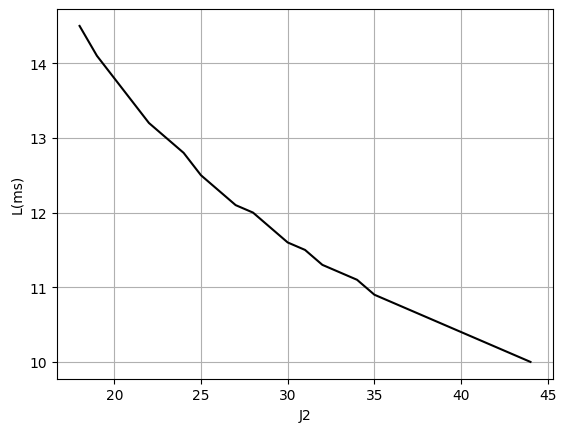

In [869]:
plt.plot(J2, L, 'k')
plt.ylabel('L(ms)')
plt.xlabel('J2')
plt.grid()

plt.show()